In [67]:
import pandas as pd

col_names = (
    'label', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 
    'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
    'proanthocyanins', 'color_intensity', 'hue', 'OD280_OD315', 'proline'
)

df = pd.read_csv('data/wine.data', names=col_names)
df

,label,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280_OD315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [68]:
y = df.pop('label')
X = df

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=99)

In [70]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## 1. DecisionTreeClassifier

In [71]:
params = {
    'max_depth': range(1, 10),
    'criterion': ("gini", "entropy", "log_loss"),
    'min_samples_leaf': range(2, 10)
}

model_ = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    cv=10,
    param_grid=params,
    n_jobs=-1
)

model_.fit(X, y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(2, 10)})

In [72]:
model_.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=3)

In [73]:
dec_tree_model = model_.best_estimator_
y_pred = dec_tree_model.predict(X_test)

print(f'accuracy: {accuracy_score(y_test, y_pred)}\n')
print(f'confusion matrix\n {confusion_matrix(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

accuracy: 0.986013986013986

confusion matrix
 [[45  1  0]
 [ 0 57  1]
 [ 0  0 39]]
              precision    recall  f1-score   support

           1       1.00      0.98      0.99        46
           2       0.98      0.98      0.98        58
           3       0.97      1.00      0.99        39

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



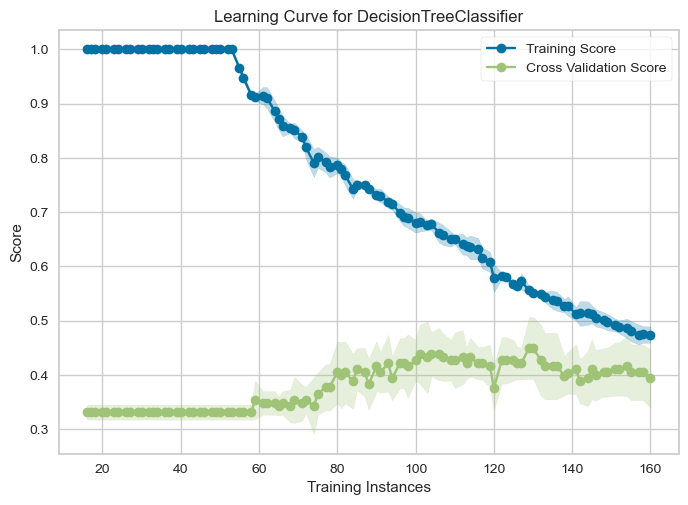

<Axes: title={'center': 'Learning Curve for DecisionTreeClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [74]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import StratifiedKFold

# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=10)
sizes = np.linspace(0.1, 1.0, 100)

X_lc = OneHotEncoder().fit_transform(X)
y_lc = LabelEncoder().fit_transform(y)

# Instantiate the classification model and visualizer
visualizer = LearningCurve(
    dec_tree_model, 
    cv=cv, 
    scoring='accuracy', 
    train_sizes=sizes, 
    n_jobs=-1
)

visualizer.fit(X_lc, y_lc)
visualizer.show()

## 2. ExtraTreeClassifier

In [75]:
params = {
    'max_depth': range(1, 10),
    'criterion': ("gini", "entropy", "log_loss"),
    'min_samples_leaf': range(2, 10)
}

model_ = GridSearchCV(
    estimator=ExtraTreeClassifier(),
    cv=10,
    param_grid=params,
    n_jobs=-1
)

model_.fit(X, y)

GridSearchCV(cv=10, estimator=ExtraTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(2, 10)})

In [76]:
model_.best_estimator_

ExtraTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=2)

In [77]:
extra_tree_model = model_.best_estimator_
y_pred = extra_tree_model.predict(X_test)

print(f'accuracy: {accuracy_score(y_test, y_pred)}\n')
print(f'confusion matrix\n {confusion_matrix(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

accuracy: 0.8321678321678322

confusion matrix
 [[41  5  0]
 [ 8 48  2]
 [ 3  6 30]]
              precision    recall  f1-score   support

           1       0.79      0.89      0.84        46
           2       0.81      0.83      0.82        58
           3       0.94      0.77      0.85        39

    accuracy                           0.83       143
   macro avg       0.85      0.83      0.83       143
weighted avg       0.84      0.83      0.83       143



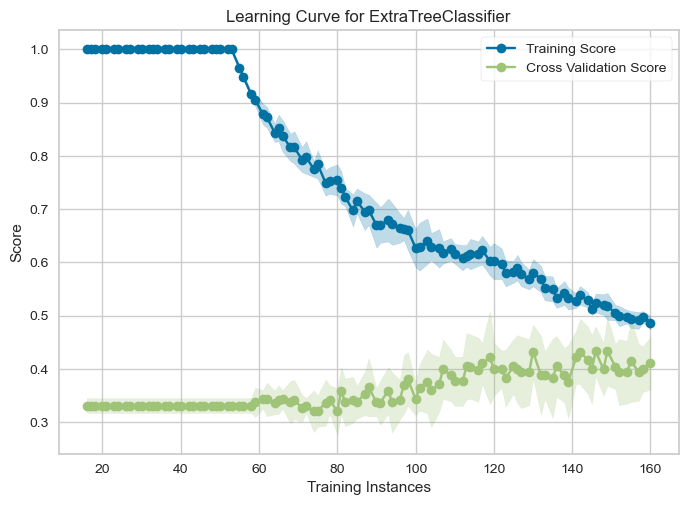

<Axes: title={'center': 'Learning Curve for ExtraTreeClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [78]:
# Instantiate the classification model and visualizer
visualizer = LearningCurve(
    extra_tree_model, 
    cv=cv, 
    scoring='accuracy', 
    train_sizes=sizes, 
    n_jobs=-1
)

visualizer.fit(X_lc, y_lc)
visualizer.show()

## 3. RandomForestClassifier

In [79]:
params = {
    'max_features': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
    'n_estimators': range(10, 20),
    'max_depth': range(1, 10),
    'criterion': ("gini", "entropy", "log_loss"),
    'min_samples_leaf': range(2, 5)
}

model_ = GridSearchCV(
    estimator=RandomForestClassifier(),
    cv=5,
    param_grid=params,
    n_jobs=-1
)

model_.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': range(1, 10),
                         'max_features': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
                         'min_samples_leaf': range(2, 5),
                         'n_estimators': range(10, 20)})

In [80]:
model_.best_estimator_

RandomForestClassifier(max_depth=3, max_features=0.2, min_samples_leaf=2,
                       n_estimators=15)

In [81]:
rand_forest_model = model_.best_estimator_
y_pred = rand_forest_model.predict(X_test)

print(f'accuracy: {accuracy_score(y_test, y_pred)}\n')
print(f'confusion matrix\n {confusion_matrix(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

accuracy: 0.993006993006993

confusion matrix
 [[46  0  0]
 [ 1 57  0]
 [ 0  0 39]]
              precision    recall  f1-score   support

           1       0.98      1.00      0.99        46
           2       1.00      0.98      0.99        58
           3       1.00      1.00      1.00        39

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



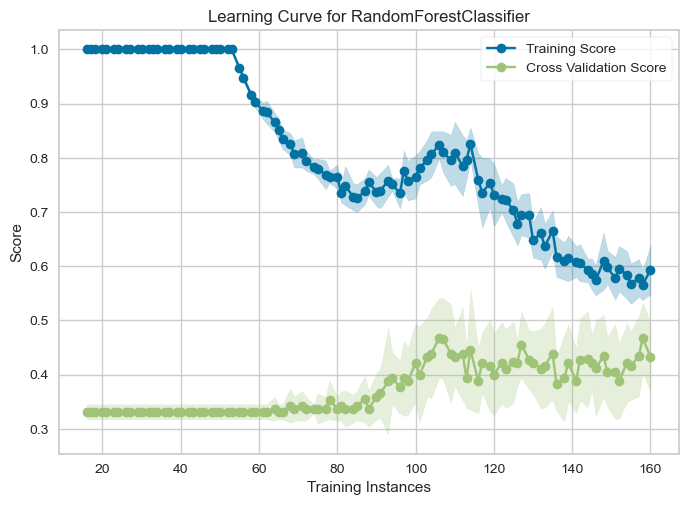

<Axes: title={'center': 'Learning Curve for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [82]:
# Instantiate the classification model and visualizer
visualizer = LearningCurve(
    rand_forest_model, 
    cv=cv, 
    scoring='accuracy', 
    train_sizes=sizes, 
    n_jobs=-1
)

visualizer.fit(X_lc, y_lc)
visualizer.show()